# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [222]:
import math

def altitude(T):
    G = 6.67 * 10**-11  
    M = 5.97 * 10**24   
    R = 6371 * 10**3
    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3)
    h_1 = h - R  
    return h_1


T_1 = float(input("Enter the desired value of T: "))
alt = altitude(T_1)

if alt < 0:
    print("The orbital period is too small to calculate")
else:
    print( alt, "meters")

Enter the desired value of T:  6000


763238.8150119483 meters


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [230]:
import math

def altitude(T):
    G = 6.67 * 10**-11  
    M = 5.97 * 10**24   
    R = 6371 * 10**3     
    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3) 
    h_1 = h - R       
    return h_1

#minutes in seconds !!
geosync = 86400 #24 hrs 
hourhalf = 5400
min45 = 2700

print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

24 hours: Altitude = 35855910.17617497 ; 90 min: Altitude = 279321.62537285965 ;  45 min: Altitude = -2181559.8978108233


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [242]:
persidereal = 86400

print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(persidereal))

24 hours: Altitude = 35855910.17617497 ; 90 min: Altitude = 35855910.17617497


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

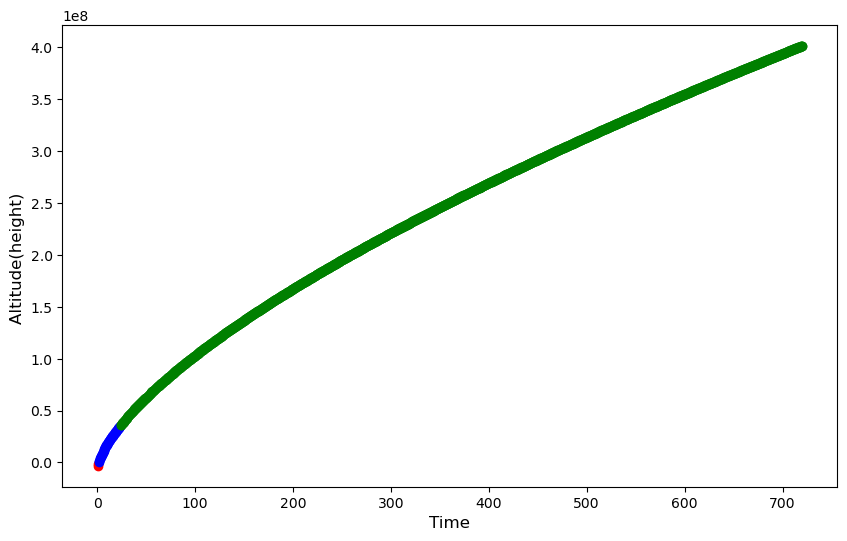

In [252]:
import math
import matplotlib.pyplot as plt


def altitude(T):
    G = 6.67 * 10**-11 
    M = 5.97 * 10**24 
    R = 6371 * 10**3    
    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3)  
    h_1 = h - R         
    return h_1


start_time = 0.5 
end_time = 30 * 24  
step = 0.5 

times = []
altitudes = []

for T in range(int(start_time * 2), int(end_time * 2) + 1):  
    T_hours = T / 2  # hours
    T_seconds = T_hours * 3600  #time to seconds 
    times.append(T_hours)
    altitudes.append(altitude(T_seconds))


plt.figure(figsize=(10, 6))


for t, alt in zip(times, altitudes):
    if alt < 0:  
        plt.scatter(t, alt, color='red')
    elif t < 24:  
        plt.scatter(t, alt, color='blue')
    else:  
        plt.scatter(t, alt, color='green')


plt.xlabel('Time', fontsize=12)
plt.ylabel('Altitude(height) ', fontsize=12)


# Show the plot
plt.show()


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [281]:
import math

def lorentz_factor(v):
    return 1 / math.sqrt(1 - v**2)

def time_earth(x, v):
    return x / v

def time_spaceship(x, v, t_earth):
    gamma = lorentz_factor(v)
 
    t_spaceship = gamma * (t_earth - (v * x) / 1)  # c =1
    return t_spaceship


def main():
 
    x = float(input("Enter the distance in light years: "))
    v = float(input("Enter the speed of the spaceship as a fraction (v/c): "))
    
 
    if v < 0 or v >= 1:
        print("Speed must be less than the speed of light.")
        return
    
    t_earth = time_earth(x, v)
    t_spaceship = time_spaceship(x, v, t_earth)
    

    print(f"\nTime in the rest frame of the Earth observer: {t_earth:.2f} years")
    print(f"Time as perceived by the passenger on the spaceship: {t_spaceship:.2f} years")


if __name__=="__main__":
    main()


Enter the distance in light years:  99999
Enter the speed of the spaceship as a fraction (v/c):  99999


Speed must be less than the speed of light.


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [323]:
import math

x = 10  # 10 light years
velocities  = [0.9, 0.98, 0.999]

for v in velocities:
    
    gamma = 1 / math.sqrt(1 - v**2)
    t_earth = x / v
    t_spaceship = gamma * (t_earth - v * x)

    print( 'For v', v)
    print("rest frame of the Earth observer", t_earth, "years")
    print(f"Time as perceived by the passenger on the spaceship: {t_spaceship:.2f} years")


For v 0.9
rest frame of the Earth observer 11.11111111111111 years
Time as perceived by the passenger on the spaceship: 4.84 years
For v 0.98
rest frame of the Earth observer 10.204081632653061 years
Time as perceived by the passenger on the spaceship: 2.03 years
For v 0.999
rest frame of the Earth observer 10.01001001001001 years
Time as perceived by the passenger on the spaceship: 0.45 years


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [3]:
import math 

a= float(0.001)

b= int(1000)

c= float(0.001)

x_1= (-b + math.sqrt(b**2 - 4*a*c)) / (2 * a)

x_2= (-b - math.sqrt(b**2 - 4*a*c)) / (2 * a)

solution= x_1 , x_2
print(solution)

(-9.999894245993346e-07, -999999.999999)


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [103]:
import math 

a= float(0.001)

b= int(1000)

c= float(0.001)

x_1= (2*c) / (-b - math.sqrt(b**2 - 4*a*c))

x_2= (2*c) / (-b + math.sqrt(b**2 - 4*a*c))

solution= x_1, x_2

print(solution)

(-1.000000000001e-06, -1000010.5755125057)


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__

In [101]:
import math


a = float(0.001)
b = int(1000)
c = float(0.001)


option = input("want to use regular formula?: ")

if option == 'yes':
    x_1= (-b + math.sqrt(b**2 - 4*a*c)) / (2 * a)
    x_2= (-b - math.sqrt(b**2 - 4*a*c)) / (2 * a)
    
elif option == 'no':
    x_1= (2*c) / (-b - math.sqrt(b**2 - 4*a*c))
    x_2= (2*c) / (-b + math.sqrt(b**2 - 4*a*c))


solution= x_1, x_2

print(solution)



want to use regular formula?:  yes


(-9.999894245993346e-07, -999999.999999)
